In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from sklearn.preprocessing import LabelEncoder
os.chdir('/home/FRACTAL/ankush.raut/Downloads/Lecture assignments/Class 1 Module 1 data')

## Preprocessing

In [3]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
submission = pd.read_csv('sample_submission.csv')

In [4]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [5]:
print('Training data size =', train.shape)
print('Test data size =', test.shape)

Training data size = (1460, 81)
Test data size = (1459, 80)


In [6]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [7]:
test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,NaN,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,NaN,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,6,1998,1998,Gable,CompShg,VinylSd,VinylSd,BrkFace,20.0,TA,TA,PConc,TA,TA,No,GLQ,602.0,Unf,0.0,324.0,926.0,GasA,Ex,Y,SBrkr,926,678,0,1604,0.0,0.0,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,1998.0,Fin,2.0,470.0,TA,TA,Y,360,36,0,0,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,1992,1992,Gable,CompShg,HdBoard,HdBoard,None,0.0,Gd,TA,PConc,Gd,TA,No,ALQ,263.0,Unf,0.0,1017.0,1280.0,GasA,Ex,Y,SBrkr,1280,0,0,1280,0.0,0.0,2,0,2,1,Gd,5,Typ,0,NaN,Attchd,1992.0,RFn,2.0,506.0,TA,TA,Y,0,82,0,0,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [8]:
submission.head()

,Id,SalePrice
0,1461,169277.052498
1,1462,187758.393989
2,1463,183583.683570
3,1464,179317.477511
4,1465,150730.079977


In [9]:
train.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [10]:
for column in train.columns:
    print(column, ', n(missing values) =', train[column].isnull().values.sum()*100/len(train), ', unique values =', 
         train[column].nunique())
    print('')

Id , n(missing values) = 0.0 , unique values = 1460

MSSubClass , n(missing values) = 0.0 , unique values = 15

MSZoning , n(missing values) = 0.0 , unique values = 5

LotFrontage , n(missing values) = 17.73972602739726 , unique values = 110

LotArea , n(missing values) = 0.0 , unique values = 1073

Street , n(missing values) = 0.0 , unique values = 2

Alley , n(missing values) = 93.76712328767124 , unique values = 2

LotShape , n(missing values) = 0.0 , unique values = 4

LandContour , n(missing values) = 0.0 , unique values = 4

Utilities , n(missing values) = 0.0 , unique values = 2

LotConfig , n(missing values) = 0.0 , unique values = 5

LandSlope , n(missing values) = 0.0 , unique values = 3

Neighborhood , n(missing values) = 0.0 , unique values = 25

Condition1 , n(missing values) = 0.0 , unique values = 9

Condition2 , n(missing values) = 0.0 , unique values = 8

BldgType , n(missing values) = 0.0 , unique values = 5

HouseStyle , n(missing values) = 0.0 , unique values = 8

O

In [11]:
excessive_missing_values = ['Alley', 'PoolQC', 'Fence', 'MiscFeature']

for column in excessive_missing_values:
    train[column] = train[column].fillna('No')
    test[column] = test[column].fillna('No')

In [12]:
train.LotFrontage = train.groupby('MSSubClass').transform(lambda x:x.fillna(x.mean()))
test.LotFrontage = test.groupby('MSSubClass').transform(lambda x:x.fillna(x.mean()))

In [13]:
print(train.LotFrontage.isnull().values.any(), test.LotFrontage.isnull().values.any())

False False


In [14]:
print('Value counts for MasVnrType train =', train.MasVnrType.value_counts())
print('Value counts for MasVnrType test =', test.MasVnrType.value_counts())

Value counts for MasVnrType train = None       864
BrkFace    445
Stone      128
BrkCmn      15
Name: MasVnrType, dtype: int64
Value counts for MasVnrType test = None       878
BrkFace    434
Stone      121
BrkCmn      10
Name: MasVnrType, dtype: int64


In [15]:
train.MasVnrType = train.MasVnrType.fillna('None')
test.MasVnrType = test.MasVnrType.fillna('None')

'''Fill null values in MasVnrArea'''

'Fill null values in MasVnrArea'

In [16]:
train.MasVnrArea = train.groupby('MasVnrType').transform(lambda x:x.fillna(x.mean()))
test.MasVnrArea = train.groupby('MasVnrType').transform(lambda x:x.fillna(x.mean()))

In [17]:
print('Value counts for BsmtQual train =', train.BsmtQual.value_counts())
print('Value counts for BsmtQual test =', test.BsmtQual.value_counts())

Value counts for BsmtQual train = TA    649
Gd    618
Ex    121
Fa     35
Name: BsmtQual, dtype: int64
Value counts for BsmtQual test = TA    634
Gd    591
Ex    137
Fa     53
Name: BsmtQual, dtype: int64


In [18]:

bsmt_features = ['BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2']

for column in bsmt_features:
    train[column] = train[column].fillna('No')
    test[column] = test[column].fillna('No')


In [19]:
print('Value counts for Electrical train =', train.Electrical.value_counts())
print('Value counts for Electrical test =', test.Electrical.value_counts())

Value counts for Electrical train = SBrkr    1334
FuseA      94
FuseF      27
FuseP       3
Mix         1
Name: Electrical, dtype: int64
Value counts for Electrical test = SBrkr    1337
FuseA      94
FuseF      23
FuseP       5
Name: Electrical, dtype: int64


In [20]:
train.Electrical = train.Electrical.fillna('SBrkr')
test.Electrical = test.Electrical.fillna('SBrkr')

In [21]:
fire_n_garage_features = ['FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageQual', 'GarageCond']

for column in fire_n_garage_features:
    train[fire_n_garage_features] = train[fire_n_garage_features].fillna('No')
    test[fire_n_garage_features] = test[fire_n_garage_features].fillna('No')

In [22]:
for column in train.columns:
    print(column, ', n(missing values) =', train[column].isnull().values.sum()*100/len(train), ', unique values =', 
         train[column].nunique(), train[column].dtype)
    print('')

Id , n(missing values) = 0.0 , unique values = 1460 int64

MSSubClass , n(missing values) = 0.0 , unique values = 15 int64

MSZoning , n(missing values) = 0.0 , unique values = 5 object

LotFrontage , n(missing values) = 0.0 , unique values = 1460 float64

LotArea , n(missing values) = 0.0 , unique values = 1073 int64

Street , n(missing values) = 0.0 , unique values = 2 object

Alley , n(missing values) = 0.0 , unique values = 3 object

LotShape , n(missing values) = 0.0 , unique values = 4 object

LandContour , n(missing values) = 0.0 , unique values = 4 object

Utilities , n(missing values) = 0.0 , unique values = 2 object

LotConfig , n(missing values) = 0.0 , unique values = 5 object

LandSlope , n(missing values) = 0.0 , unique values = 3 object

Neighborhood , n(missing values) = 0.0 , unique values = 25 object

Condition1 , n(missing values) = 0.0 , unique values = 9 object

Condition2 , n(missing values) = 0.0 , unique values = 8 object

BldgType , n(missing values) = 0.0 , un

In [23]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,1.0,8450,Pave,No,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,1.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,No,Attchd,2003,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,No,No,No,0,2,2008,WD,Normal,208500
1,2,20,RL,2.0,9600,Pave,No,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,2.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,No,No,No,0,5,2007,WD,Normal,181500
2,3,60,RL,3.0,11250,Pave,No,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,3.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,No,No,No,0,9,2008,WD,Normal,223500
3,4,70,RL,4.0,9550,Pave,No,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,4.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,No,No,No,0,2,2006,WD,Abnorml,140000
4,5,60,RL,5.0,14260,Pave,No,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,5.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,No,No,No,0,12,2008,WD,Normal,250000


## Label encoding

In [24]:
lbl_ef = LabelEncoder()
lbl_ef.fit(train.Exterior1st)

test.Exterior1st = test.Exterior1st.map(lambda s: '<unknown>' if s not in lbl_ef.classes_ else s)
lbl_ef.classes_ = np.append(lbl_ef.classes_, '<unknown>')
train.Exterior1st = lbl_ef.transform(train.Exterior1st)
test.Exterior1st = lbl_ef.transform(test.Exterior1st)

In [25]:
lbl_rm = LabelEncoder()
train.RoofMatl = lbl_rm.fit_transform(train.RoofMatl)
test.RoofMatl = lbl_rm.transform(test.RoofMatl)

In [26]:
lbl_rs = LabelEncoder()
train.RoofStyle = lbl_rs.fit_transform(train.RoofStyle)
test.RoofStyle = lbl_rs.transform(test.RoofStyle)

In [27]:
lbl_hs = LabelEncoder()
train.HouseStyle = lbl_hs.fit_transform(train.HouseStyle)
test.HouseStyle = lbl_hs.transform(test.HouseStyle)

In [28]:
train = train.join(pd.get_dummies(train.BldgType)).drop(columns = ['BldgType'])
test = test.join(pd.get_dummies(test.BldgType)).drop(columns = ['BldgType'])

In [29]:
lbl_c2 = LabelEncoder()
train.Condition2 = lbl_c2.fit_transform(train.Condition2)
test.Condition2 = lbl_c2.transform(test.Condition2)

In [30]:
lbl_c1 = LabelEncoder()
train.Condition1 = lbl_c1.fit_transform(train.Condition1)
test.Condition1 = lbl_c1.transform(test.Condition1)

In [31]:
lbl_n = LabelEncoder()
train.Neighborhood = lbl_n.fit_transform(train.Neighborhood)
test.Neighborhood = lbl_n.transform(test.Neighborhood)

In [32]:
train.LandSlope = train.LandSlope.replace(['Gtl', 'Mod', 'Sev'],[0, 1, 2])
test.LandSlope = test.LandSlope.replace(['Gtl', 'Mod', 'Sev'],[0, 1, 2])

In [33]:
train = train.join(pd.get_dummies(train.LotConfig)).drop(columns = ['LotConfig'])
test = test.join(pd.get_dummies(test.LotConfig)).drop(columns = ['LotConfig'])

In [34]:
train.Utilities = train.Utilities.replace(['NoSeWa', 'AllPub'],[0, 1])
test.Utilities = test.Utilities.replace(['NoSeWa', 'AllPub'],[0, 1])

In [35]:
train.LandContour = train.LandContour.replace(['Bnk','Lvl', 'Low', 'HLS'],[0, 1, 2, 3])
test.LandContour = test.LandContour.replace(['Bnk','Lvl', 'Low', 'HLS'],[0, 1, 2, 3])

In [36]:
train = train.join(pd.get_dummies(train.LotShape))
test = test.join(pd.get_dummies(test.LotShape))

In [37]:
train = train.drop(columns = ['LotShape'])
test = test.drop(columns = ['LotShape'])

In [38]:
print(train.shape, test.shape)

(1460, 92) (1459, 91)


In [39]:
train.MSZoning = train.MSZoning.replace(['C (all)', 'RM', 'RH', 'RL', 'FV'],[0, 1, 2, 3, 4])
test.MSZoning = test.MSZoning.replace(['C (all)', 'RM', 'RH', 'RL', 'FV'],[0, 1, 2, 3, 4])

In [40]:
train.Street = train.Street.replace(['Grvl', 'Pave'],[0, 1])
test.Street = test.Street.replace(['Grvl', 'Pave'],[0, 1])

In [41]:
train.Alley = train.Alley.replace(['Grvl', 'Pave', 'No'],[0, 1, 2])
test.Alley = test.Alley.replace(['Grvl', 'Pave', 'No'],[0, 1, 2])

In [42]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LandContour,Utilities,LandSlope,Neighborhood,Condition1,Condition2,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,1Fam,2fmCon,Duplex,Twnhs,TwnhsE,Corner,CulDSac,FR2,FR3,Inside,IR1,IR2,IR3,Reg
0,1,60,3,1.0,8450,1,2,1,1,0,5,2,2,5,7,5,2003,2003,1,1,12,VinylSd,BrkFace,1.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,No,Attchd,2003,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,No,No,No,0,2,2008,WD,Normal,208500,1,0,0,0,0,0,0,0,0,1,0,0,0,1
1,2,20,3,2.0,9600,1,2,1,1,0,24,1,2,2,6,8,1976,1976,1,1,8,MetalSd,None,2.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,No,No,No,0,5,2007,WD,Normal,181500,1,0,0,0,0,0,0,1,0,0,0,0,0,1
2,3,60,3,3.0,11250,1,2,1,1,0,5,2,2,5,7,5,2001,2002,1,1,12,VinylSd,BrkFace,3.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,No,No,No,0,9,2008,WD,Normal,223500,1,0,0,0,0,0,0,0,0,1,1,0,0,0
3,4,70,3,4.0,9550,1,2,1,1,0,6,2,2,5,7,5,1915,1970,1,1,13,Wd Shng,None,4.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,No,No,No,0,2,2006,WD,Abnorml,140000,1,0,0,0,0,1,0,0,0,0,1,0,0,0
4,5,60,3,5.0,14260,1,2,1,1,0,15,2,2,5,8,5,2000,2000,1,1,12,VinylSd,BrkFace,5.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,No,No,No,0,12,2008,WD,Normal,250000,1,0,0,0,0,0,0,1,0,0,1,0,0,0


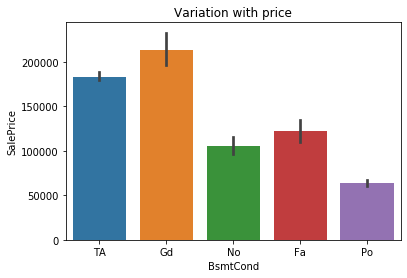

In [43]:
plt.title('Variation with price')
sns.barplot(train.BsmtCond, train.SalePrice)
plt.show()

In [44]:
train.BsmtQual.replace(['No', 'Fa', 'TA', 'Gd', 'Ex'],[0,1,2,3,4], inplace = True)
test.BsmtQual.replace(['No', 'Fa', 'TA', 'Gd', 'Ex'],[0,1,2,3,4], inplace = True)

In [45]:
train.Foundation.replace(['Slab', 'BrkTil', 'CBlock', 'Stone', 'Wood', 'PConc'],[0,1,2,3,4,5], inplace = True)
test.Foundation.replace(['Slab', 'BrkTil', 'CBlock', 'Stone', 'Wood', 'PConc'],[0,1,2,3,4,5], inplace = True)

In [46]:
train.ExterCond.replace(['Po', 'Fa', 'Gd', 'TA', 'Ex'],[0,1,2,3,4], inplace = True)
test.ExterCond.replace(['Po', 'Fa', 'Gd', 'TA', 'Ex'],[0,1,2,3,4], inplace = True)

In [47]:
train.ExterQual.replace(['Fa', 'TA', 'Gd', 'Ex'],[0,1,2,3], inplace = True)
test.ExterQual.replace(['Fa', 'TA', 'Gd', 'Ex'],[0,1,2,3], inplace = True)

In [48]:
train.MasVnrType.replace(['BrkCmn', 'None', 'BrkFace', 'Stone'],[0,1,2,3], inplace = True)
test.MasVnrType.replace(['BrkCmn', 'None', 'BrkFace', 'Stone'],[0,1,2,3], inplace = True)

In [49]:
lbl_es = LabelEncoder()
lbl_es.fit(train.Exterior2nd)

test.Exterior2nd = test.Exterior2nd.map(lambda s: '<unknown>' if s not in lbl_es.classes_ else s)
lbl_es.classes_ = np.append(lbl_es.classes_, '<unknown>')
train.Exterior2nd = lbl_es.transform(train.Exterior2nd)
test.Exterior2nd = lbl_es.transform(test.Exterior2nd)

In [50]:
train = train.select_dtypes(exclude = [object])
test = test.select_dtypes(exclude = [object])

In [51]:
train.shape

(1460, 70)

In [52]:
test.shape

(1459, 69)

In [53]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LandContour,Utilities,LandSlope,Neighborhood,Condition1,Condition2,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice,1Fam,2fmCon,Duplex,Twnhs,TwnhsE,Corner,CulDSac,FR2,FR3,Inside,IR1,IR2,IR3,Reg
0,1,60,3,1.0,8450,1,2,1,1,0,5,2,2,5,7,5,2003,2003,1,1,12,13,2,1.0,2,3,5,3,706,0,150,856,856,854,0,1710,1,0,2,1,3,1,8,0,2,548,0,61,0,0,0,0,0,2,2008,208500,1,0,0,0,0,0,0,0,0,1,0,0,0,1
1,2,20,3,2.0,9600,1,2,1,1,0,24,1,2,2,6,8,1976,1976,1,1,8,8,1,2.0,1,3,2,3,978,0,284,1262,1262,0,0,1262,0,1,2,0,3,1,6,1,2,460,298,0,0,0,0,0,0,5,2007,181500,1,0,0,0,0,0,0,1,0,0,0,0,0,1
2,3,60,3,3.0,11250,1,2,1,1,0,5,2,2,5,7,5,2001,2002,1,1,12,13,2,3.0,2,3,5,3,486,0,434,920,920,866,0,1786,1,0,2,1,3,1,6,1,2,608,0,42,0,0,0,0,0,9,2008,223500,1,0,0,0,0,0,0,0,0,1,1,0,0,0
3,4,70,3,4.0,9550,1,2,1,1,0,6,2,2,5,7,5,1915,1970,1,1,13,15,1,4.0,1,3,1,2,216,0,540,756,961,756,0,1717,1,0,1,0,3,1,7,1,3,642,0,35,272,0,0,0,0,2,2006,140000,1,0,0,0,0,1,0,0,0,0,1,0,0,0
4,5,60,3,5.0,14260,1,2,1,1,0,15,2,2,5,8,5,2000,2000,1,1,12,13,2,5.0,2,3,5,3,655,0,490,1145,1145,1053,0,2198,1,0,2,1,4,1,9,1,3,836,192,84,0,0,0,0,0,12,2008,250000,1,0,0,0,0,0,0,1,0,0,1,0,0,0


In [54]:
train.to_csv('processed_train.csv', index = False)
test.to_csv('processed_test.csv', index = False)